# Features
## This is what each feature mean !
**age** 
age in years

**sex**
(1 = male; 0 = female)

**cp**
chest pain type [3, 2, 1, 0]
<br>-- Value 0: typical angina 
<br>-- Value 1: atypical angina 
<br>-- Value 2: non-anginal pain 
<br>-- Value 3: asymptomatic

**trestbps**
resting blood pressure (in mm Hg on admission to the hospital)

**chol**
serum cholestoral in mg/dl

**fbs**
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

** restecg**
resting electrocardiographic results
<br>-- Value 0: normal 
<br>-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
<br>-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

** thalach**
maximum heart rate achieved

** exang**
exercise induced angina (1 = yes; 0 = no)

** oldpeakST**
depression induced by exercise relative to rest

** slope**
the slope of the peak exercise ST segment

** ca**
number of major vessels (0-3) colored by flourosopy

** thal**
3 = normal; 6 = fixed defect; 7 = reversable defect

**target**
1 or 0


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import string

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
import nltk

import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib import rcParams

rcParams['figure.figsize'] = 11,11


In [6]:
path = './'
filename = 'heart.csv'

try:
    data_heart = pd.read_csv(path+filename)
    print("File Loaded Succesfully ")
except:
    print("File Not Found !!")

File Loaded Succesfully 


### How many data points for each class ?
The dataset is almost balanced ✔✔✔✔

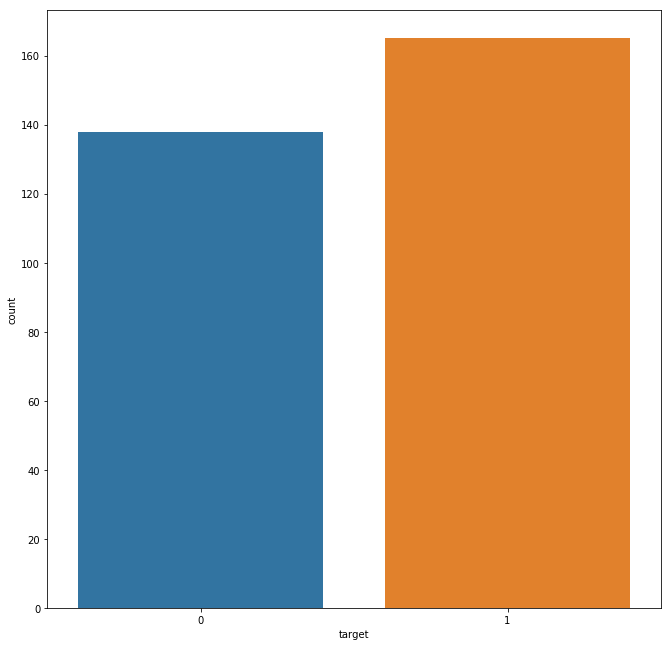

In [7]:
ax = sns.countplot(x="target", data = data_heart)

### Does The dataset have missingvalues ?
there are no missing values ✔✔✔✔

In [33]:
for col in data_heart.columns.values:
    print(data_heart[col].isnull().sum()," missing values in -",col)

0  missing values in - age
0  missing values in - sex
0  missing values in - cp
0  missing values in - trestbps
0  missing values in - chol
0  missing values in - fbs
0  missing values in - restecg
0  missing values in - thalach
0  missing values in - exang
0  missing values in - oldpeak
0  missing values in - slope
0  missing values in - ca
0  missing values in - thal
0  missing values in - target


In [25]:
print(data_heart.columns.values.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [29]:
data_heart[data_heart['target'] == 1].mean()

age          52.496970
sex           0.563636
cp            1.375758
trestbps    129.303030
chol        242.230303
fbs           0.139394
restecg       0.593939
thalach     158.466667
exang         0.139394
oldpeak       0.583030
slope         1.593939
ca            0.363636
thal          2.121212
target        1.000000
dtype: float64

In [30]:
data_heart[data_heart['target'] == 0].mean()

age          56.601449
sex           0.826087
cp            0.478261
trestbps    134.398551
chol        251.086957
fbs           0.159420
restecg       0.449275
thalach     139.101449
exang         0.550725
oldpeak       1.585507
slope         1.166667
ca            1.166667
thal          2.543478
target        0.000000
dtype: float64